# Introduction to Machine Learning
So; usually when most of us hear the concept of machine learning we imagine the future. Advanced artificial intelligence so lifelike that it may even be confused for a human; maybe we think about Skynet or some other distopian AI which makes cold and calculating choices for the "benefit" of mankind. Truth to be told; machine learning is not the future; it's the present and even now it has a large impact in society. From suggested products in Amazon all to way toclassification of spam e-mail in any e-mail service and cancer detection via image analysis; machine learning (along with deep learning) is proving a field with a large amount of potential. So... what's machine learning?

Machine Learning is by definition; a field in which the computer learns rules that aren't programmed explicitly to it. That means that machine learning doesn't involve us writing rules in if statements; or downloading and processing large amounts of data. It occurs when using a given method (a user given method); a computer analyses some data which allows it to make certain predictions out of future data or data the model wasn't trained with.

Now; how is that any different from us writing the rules by hand? Let's take for example one of the most widespread application of machine learning which is SPAM mail detection and how we would solve it explicitly and with machine learning.

If we were to program the algorithm by hand; we would read the e-mails, make a list of the most frequent words that come in spam mails and then write the following statement.

if word in spam_list:
    mail=spam

Why is that an explicit rule? Because that rule wasn't made by our computer; we just wrote it there for it. This doesn't mean that this wont work; it may work at first but if spam companies start catching up then they might change some words which will involve us modifying the list manually. 

If we did a spam e-mail filter were to be done using machine learning algorithms; first it would need a sample of data to train on (plaintext e-mails and label whether it's spam or not). The next step would be to transform the data into features which the computer is able to understand (frequency of words, a measure of how "spam" a word is) and finally; a model would be trained on said data and we would be able to predict future spam e-mails using the rules obtained from the data.

Not only that; but this model can also be trained on new future data and therefore, it can adapt to changes done by spam email senders. Since this new training can be automatized; it doesn't require user input on that account.

### (Do the K-means activity here)

## Color clustering exercise

In this exercise we're going to apply the clustering algorithm in a purely unsupervised manner to an image to segment color. That is; we're going to make a function that takes 3 inputs (the image to cluster, the number of colors we want to detect, and whether we show the graph or not).

1.1 Load a color image into Python; in this case you're free to use the image you want!

1.2 Find a way to visualize your features in a way that K means can interpret them. Remember K-means finds the distance between points.

1.3 Train the k-means model with the image.

1.4 Find a way to count the number of times a label appears in the resulting image.

1.5 Do a graph that shows us the proportion of colors.

1.6 Have the function return the RGB centers of the clusters.

Challenge (For a much better visualization)

1.6 Google how to transform from RGB format to hexadecimal.

1.7 Create a function that converts from rgb to hexadecimal.

1.8 Convert the RGB colors to Hexadecimal to make sure the proportions have the same color as the colors they represent.

Final challenge

1.9 Replace the colors in the image by the appropriate labels; then display the resulting image.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

(180200, 3)
[0 0 0 ... 0 0 0]


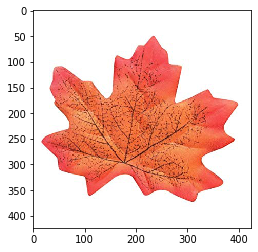

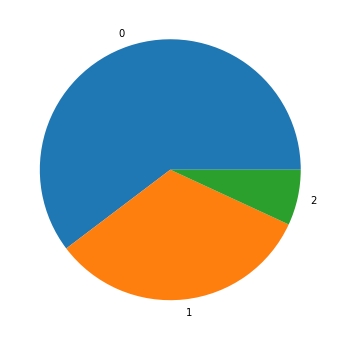

In [53]:
def color(image, number_of_colors, show_chart=True):
    # Reshape the image to make a two dimensional
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)

    # Train K-means model
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    # Find how many pixels are classified to each cluster
    unique, counts = np.unique(labels, return_counts=True)
    
    # Extract centers
    center_colors = clf.cluster_centers_
    #If we can show the chart; show a pie chart
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts, labels = unique)
        plt.show()
    # Returns clusters
    return center_colors

leaf_img = plt.imread("img/leaf.jpg")
plt.imshow(leaf_img)
c = color(leaf_img, 3)


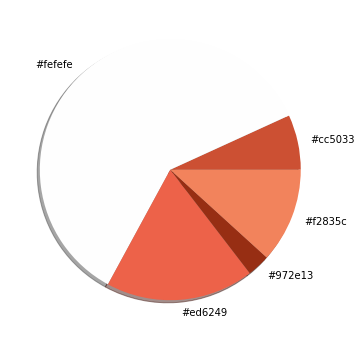

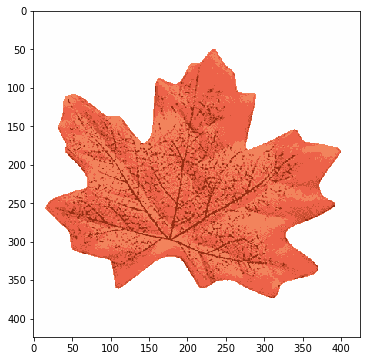

In [52]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def color_advanced(image, number_of_colors, show_chart=True, show_image=True):
    # Same steps as before
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    unique, counts = np.unique(labels, return_counts=True)
    center_colors = clf.cluster_centers_
    
    #This code allows us to write the image in terms of the labels.
    center = np.uint8(center_colors)
    
    #The image is made here
    result = center[labels]
    #We reshape it here
    new_img = result.reshape((image.shape))
    
    # Since the clusters aren't always in order, we use this to order it.
    ordered_colors = [center_colors[i] for i in unique]
    # Transform from rgb to hex
    hex_colors = [RGB2HEX(color) for color in ordered_colors]
    
    # Show the chart
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts,
                labels = hex_colors, #So each part of the pie chart is tagged.
                colors = hex_colors,
                shadow=True) #So each part of the pie chart is the same color as the one they represent.
        plt.show()
        
    if (show_image):
        plt.figure(figsize= (8, 6))
        plt.imshow(new_img)
        plt.show()
        
    return ordered_colors
img = plt.imread("img/leaf.jpg")
c2 = color_advanced(img,5)

# Additional notes (if you want to learn more!)

### Types of learning

Although there are many types of machine learning algorithms; they can be classified based on the following properties.

Whether they do the learning supervised or unsupervised.

Whether they do batch learning or online learning.

Whether it's instance based or model based.

Supervised Learning: This type doesn't mean that we'll be actively monitoring the algorithm; supervised learning just means that you have observations with variables (x1, x2, x3, x4) and a label showing the response. Returning to the credit example; we could have as variables: Age, gender, income, credit score and the response would be (Default or No Default). 

Unsupervised learning: In this case our observations have no labels and as such we're left with only the variables. Therefore; the computer starts creating rules depending on the distance and or frequency of certain observations (they create the labels). In this case we're unable to divide between training and testing set since there is no answer to correctly evaluate the performance of our model (no labels).

Batch Learning: In batch learning algorithms; the model is trained all at once and then never updated again. That means that we give it all of our data and then put the model to work; this is mostly done offline due to the resource consumption but if an update on the model is required then the model is made from scratch.

Online learning: The model is trained continously on mini batches of data; the fact that it can keep learning makes it perfect for online implementations since it usually receives a constant stream of information that it does need to process.

Instance based: The predictions of new points are made when compared to old ones; there isn't a general model since it just depends on all the data you have.

Model Based: In this  type of learning we have a set model or equation that allows us to calculate an output without comparing the new point with the old ones.

In the case of image classification we can choose to do either classification algorithms (which are supervised) or clustering algorithms (unsupervised). We'll be focusing our efforts on clustering since most of the time we don't have labeled images; however, both follow very similar principals since most of them are instance based.

### How does a machine learning process look?

The process of solving a problem with machine learning isn't as simple and straightforward as one might think. There are quite the number of people that imagine machine learning as being a black box that spits out a solution to our problem; however, there is a lot more to this than just a magic algorithm that solves our problems. We will review the steps one usually does to solve a problem using machine learning.

Step 1: Find the problem you want to solve. (Ex: I want to increase earnings of the bank).

Step 2: Break it down into smaller pieces; find a way to go from a really general problem into a particular one that allows for machine learning. Ex: I want to increase earnings -> I want to reduce credit defaults -> I want to find a better way to determine who will default on their debt. (Prediction and classify are golden words).

Step 3: Now that you have a problem; start thinking about what kind of data can help you in that given problem. (Considering the credit example; maybe data of your customers could help, in this case the more you have the better).

Step 4: Obtain the data. This step doesn't just involve downnloading information; it also involves filtering, cleaning columns and applying transformations if necessary (santardizing).

Step 5: Explore your data and search for patterns (search for important variables). This can be done in many ways; we could do it visually by looking at scatterplots or use some statistical indicators that give a measure of how important a certain variable is.

Step 6: Divide your data into training or testing set if necessary. If we have unsupervised learning then it's not really necessary since we don't have an answer to compare it to.

Step 7: Train your model. Once you have all of your data ready now you're ready to train your model; be sure to select the appropriate parameters.

Step 8: Test it; obtain a measurement of accuracy. (Ignore this if you're doing clustering without labels).

Step 9: Conclude something and if needed, try again. (If accuracy is too low or maybe one variable turned out not to be significant; then you could do some modifications to the model and try again).

Though it may seem complicated; we'll do a simple example to see how each of these steps would work in an actual problem.

Open the K means example notebook!

## Higher dimensional K-Means.
In the previous example we ran the k-means algorithm in 2 dimensions (we only used two variables) and therefore we were able to visualize the results easily by using a scatter plot. If we were to use 3 variables or more then we wouldn't be able to visualize the points and centroids in a scatter plot (3D visualization is very hard but not impossible); however, the algorithm still holds its validity in the sense that we can run it and obtain a significant result that'll allow us to group certain observations together. We can even obtain useful visualizations!

Let's try running the example again; but using all of the variables (except the class variable).

Now; why might we want or not want to use more variables? If the algorithm implementation is identical with more variables then why wouldn't we want it?

#### Benefits to using more variables: 

You avoid information loss: Sometimes; a variable that we might not consider relevant can turn out to be important which can greately impact the performance of the model.

High accuracy: Generally; models using a lot of variables have high accuracy.

Prevention of Underfitting: Using a large amount of variables allows the model to capture the general trend of the data. (But it may also capture the noise).

#### Benefits to less variables: 

General model: With less information you're able to explain a good amount of the phenomena; meaning that your model is faster and can be more general.

Overfitting prevention: If we used large amounts of variables we may end up with an accuracy close to 100%; however, 

Problem simplification: Having less variables makes your problem simpler since you have to consider less interactions and relationships between them.

### So... what's the message?
The message is that sometimes more is not always better and that we should always be aware of that; therefore, we need to make sure to study our dataset and problem well enough such that we prevent both overfitting and underfitting.